In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
# Geography and scenarios
geo = ['SF'] 
sce = ['baseline', 'flat', 'income-based']
metrics = ['vmt_mode', 'vmt_mode_av', 'vht_mode', 'vht_mode_av', 'speed_mode', 'trip_count', 'primary_e_mode', 'secondary_e_mode']

In [6]:
list_tables = []
list_df = []
for i in metrics:
    for j in sce:
        for k in geo:
            var = f'{i}_{j}_{k}.csv'
            df = pd.read_csv(var)
            df['geo'] = k
            df['scenario'] = j
            list_tables.append(var)
            list_df.append(df)

In [7]:
list_tables

['vmt_mode_baseline_SF.csv',
 'vmt_mode_flat_SF.csv',
 'vmt_mode_income-based_SF.csv',
 'vmt_mode_av_baseline_SF.csv',
 'vmt_mode_av_flat_SF.csv',
 'vmt_mode_av_income-based_SF.csv',
 'vht_mode_baseline_SF.csv',
 'vht_mode_flat_SF.csv',
 'vht_mode_income-based_SF.csv',
 'vht_mode_av_baseline_SF.csv',
 'vht_mode_av_flat_SF.csv',
 'vht_mode_av_income-based_SF.csv',
 'speed_mode_baseline_SF.csv',
 'speed_mode_flat_SF.csv',
 'speed_mode_income-based_SF.csv',
 'trip_count_baseline_SF.csv',
 'trip_count_flat_SF.csv',
 'trip_count_income-based_SF.csv',
 'primary_e_mode_baseline_SF.csv',
 'primary_e_mode_flat_SF.csv',
 'primary_e_mode_income-based_SF.csv',
 'secondary_e_mode_baseline_SF.csv',
 'secondary_e_mode_flat_SF.csv',
 'secondary_e_mode_income-based_SF.csv']

In [8]:
# Calculate mode shares

# drop bike_transit and teleportation:
list_df[15].drop(list_df[15][list_df[15]['legMode'] == 'bike_transit'].index, inplace = True)
list_df[16].drop(list_df[16][list_df[16]['legMode'] == 'bike_transit'].index, inplace = True)
list_df[17].drop(list_df[17][list_df[17]['legMode'] == 'bike_transit'].index, inplace = True)

list_df[15].drop(list_df[15][list_df[15]['legMode'] == 'hov2_teleportation'].index, inplace = True)
list_df[16].drop(list_df[16][list_df[16]['legMode'] == 'hov2_teleportation'].index, inplace = True)
list_df[17].drop(list_df[17][list_df[17]['legMode'] == 'hov2_teleportation'].index, inplace = True)

list_df[15].drop(list_df[15][list_df[15]['legMode'] == 'hov3_teleportation'].index, inplace = True)
list_df[16].drop(list_df[16][list_df[16]['legMode'] == 'hov3_teleportation'].index, inplace = True)
list_df[17].drop(list_df[17][list_df[17]['legMode'] == 'hov3_teleportation'].index, inplace = True)

list_df[15] = list_df[15].reset_index(drop=True)
list_df[16] = list_df[16].reset_index(drop=True)
list_df[17] = list_df[17].reset_index(drop=True)  

grouped_sum_15 = list_df[15]['count'].sum()
grouped_sum_16 = list_df[16]['count'].sum()
grouped_sum_17 = list_df[17]['count'].sum()

list_df[15]['Share'] = list_df[15]['count'] / grouped_sum_15
list_df[16]['Share'] = list_df[16]['count'] / grouped_sum_16
list_df[17]['Share'] = list_df[17]['count'] / grouped_sum_17

# Calculate difference with respect to baseline
list_df[15]['Diff wrt baseline'] = (list_df[15]['count'] - list_df[15]['count'])
list_df[16]['Diff wrt baseline'] = (list_df[16]['count'] - list_df[15]['count'])/list_df[15]['count']
list_df[17]['Diff wrt baseline'] = (list_df[17]['count'] - list_df[15]['count'])/list_df[15]['count']


In [9]:
# Verify 100%
list_df[17]['Share'].sum()

1.0

In [10]:
trip_count = pd.concat([list_df[15], list_df[16], list_df[17]])
trip_count

,legMode,count,geo,scenario,Share,Diff wrt baseline
0,bike,8961,SF,baseline,0.027783,0.000000
1,car,132234,SF,baseline,0.409980,0.000000
2,car_hov2,30222,SF,baseline,0.093701,0.000000
3,car_hov3,20187,SF,baseline,0.062588,0.000000
4,drive_transit,952,SF,baseline,0.002952,0.000000
5,ride_hail,5076,SF,baseline,0.015738,0.000000
6,ride_hail_pooled,1604,SF,baseline,0.004973,0.000000
7,walk,56934,SF,baseline,0.176519,0.000000
8,walk_transit,66368,SF,baseline,0.205768,0.000000
0,bike,9916,SF,flat,0.031159,0.106573


In [12]:
# Cleaning the names
legMode_mapping = {
    'car': 'Car',
    'car_hov2': 'Car HOV 2',
    'car_hov3': 'Car HOV 3',
    'drive_transit': 'Drive to Transit',
    'ride_hail': 'Ride-Hail',
    'ride_hail_pooled': 'Ride-Hail Pooled',
    'walk': 'Walk',
    'walk_transit': 'Walk to Transit',
    'bike': 'Bike'
}

# Replace legMode names using the mapping
trip_count['legMode'] = trip_count['legMode'].replace(legMode_mapping)

In [13]:
trip_count_trim = trip_count[trip_count['scenario'] != 'baseline']

In [14]:
# Create a new column 'legModeGroup' to group specific legModes
trip_count_trim['ModeGroup'] = trip_count_trim['legMode'].replace({'car': 'Car Modes', 'car_hov2': 'Car Modes', 'car_hov3': 'Car Modes', 'Drive to Transit:': 'Transit', 
                                                                  'Walk to Transit': 'Transit', 'Ride-Hail': 'Ride-Hail', 'Ride-Hail Pooled': 'Ride-Hail',
                                                                  'Walk': 'Active Modes', 'Bike': 'Active Modes'})

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/426030707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_count_trim['ModeGroup'] = trip_count_trim['legMode'].replace({'car': 'Car Modes', 'car_hov2': 'Car Modes', 'car_hov3': 'Car Modes', 'Drive to Transit:': 'Transit',


In [15]:
plot_order = ['Car', 'Car HOV 2', 'Car HOV 3', 'Drive to Transit', 'Walk to Transit', 'Ride-Hail', 'Ride-Hail Pooled', 'Walk', 'Bike']

In [18]:
trip_count_rh = trip_count_trim[(trip_count_trim['legMode'] == 'Ride-Hail') | (trip_count_trim['legMode'] == 'Ride-Hail Pooled')]

In [19]:
trip_count_rh['legMode'].value_counts()

legMode
Ride-Hail           2
Ride-Hail Pooled    2
Name: count, dtype: int64

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/4249283101.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


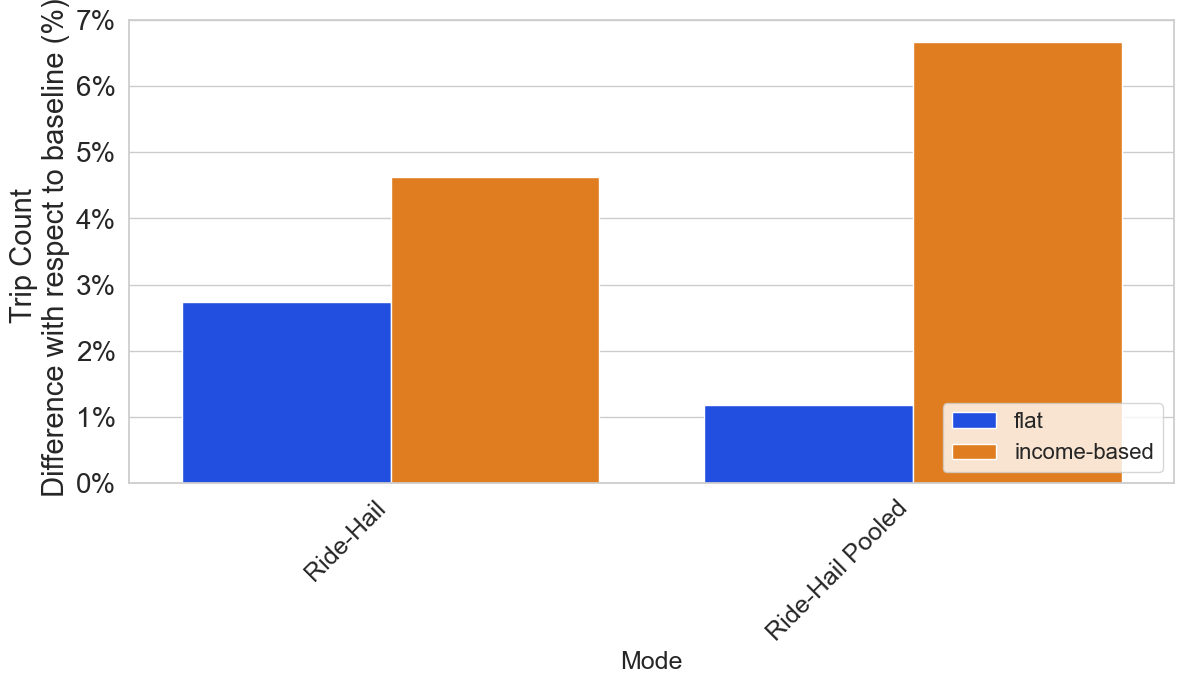

In [20]:
# Plotting using Seaborn
#trip_count_trim
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='legMode', y='Diff wrt baseline', hue='scenario', data=trip_count_rh,
                 #order = plot_order,
                 palette='bright')
plt.xlabel('Mode', fontsize=18)
plt.ylabel('Trip Count \n Difference with respect to baseline (%)', fontsize=21)
#plt.title('Difference of Trip Count by Mode compared to Baseline by Scenario', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.tight_layout()
plt.legend(loc='lower right', fontsize=16)
# Add label grouping below x-axis
#group_labels = ['Car Modes', 'Car Modes', 'Car Modes', 'Transit', 'Transit', 'Ride-Hail', 'Ride-Hail', 'Active Modes', 'Active Modes']
#ax.set_xticklabels(group_labels)



plt.show()

In [21]:
# VMT by mode
# Calculate difference with respect to baseline
list_df[0]['Diff wrt baseline'] = (list_df[0]['length'] - list_df[0]['length'])
list_df[1]['Diff wrt baseline'] = (list_df[1]['length'] - list_df[0]['length'])/list_df[0]['length']
list_df[2]['Diff wrt baseline'] = (list_df[2]['length'] - list_df[0]['length'])/list_df[0]['length']

In [22]:
vmt_mode= pd.concat([list_df[0], list_df[1], list_df[2]])
vmt_mode

,mode,length,geo,scenario,Diff wrt baseline
0,bike,2.979239e+07,SF,baseline,0.000000
1,bus,7.610573e+07,SF,baseline,0.000000
2,bus_empty,9.162309e+07,SF,baseline,0.000000
3,cable_car,9.235944e+05,SF,baseline,0.000000
4,cable_car_empty,1.203774e+06,SF,baseline,0.000000
...,...,...,...,...,...
18,subway,1.161673e+07,SF,income-based,0.003911
19,subway_empty,2.811884e+05,SF,income-based,-0.138638
20,tram,1.360751e+07,SF,income-based,0.040774
21,tram_empty,6.633458e+06,SF,income-based,-0.074386


In [23]:
# List of modes
modes_to_drop = ['bus_empty', 'cable_car', 'cable_car_empty', 'car_emer', 'car_hov2_emer', 'car_hov3_emer',
                'ferry', 'ferry_empty', 'rail_empty', 'subway_empty', 'tram_empty'] 

# Create a boolean mask to identify rows that match the values in the list
mask = vmt_mode['mode'].isin(modes_to_drop) 

# Drop the rows that match the values in the list
vmt_mode = vmt_mode[~mask]

In [24]:
# Cleaning the names
mode_mapping = {
    'car': 'Car',
    'car_hov2': 'Car HOV 2',
    'car_hov3': 'Car HOV 3',
    'car_RideHail': 'Ride-Hail',
    'car_RideHail_Pool': 'Ride-Hail Pooled',
    'car_RideHail_empty' : 'Ride-Hail Empty',
    'walk': 'Walk',
    'bike': 'Bike',
    'bus' : 'Bus',
    'tram' : 'Tram',
    'rail' : 'Rail',
    'subway' : 'Subway'
}

# Replace legMode names using the mapping
vmt_mode['mode'] = vmt_mode['mode'].replace(mode_mapping)

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/2406837235.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vmt_mode['mode'] = vmt_mode['mode'].replace(mode_mapping)


In [25]:
vmt_mode.head()

,mode,length,geo,scenario,Diff wrt baseline
0,Bike,2.979239e+07,SF,baseline,0.0
1,Bus,7.610573e+07,SF,baseline,0.0
5,Car,2.029864e+09,SF,baseline,0.0
6,Ride-Hail,4.962402e+07,SF,baseline,0.0
7,Ride-Hail Pooled,3.712607e+05,SF,baseline,0.0


In [26]:
# Convert to miles (From meters)
vmt_mode['length'] = vmt_mode['length'] / 1609.34

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/723967624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vmt_mode['length'] = vmt_mode['length'] / 1609.34


In [27]:
vmt_mode.head()

,mode,length,geo,scenario,Diff wrt baseline
0,Bike,1.851218e+04,SF,baseline,0.0
1,Bus,4.729002e+04,SF,baseline,0.0
5,Car,1.261302e+06,SF,baseline,0.0
6,Ride-Hail,3.083501e+04,SF,baseline,0.0
7,Ride-Hail Pooled,2.306913e+02,SF,baseline,0.0


In [28]:
plot_order_vmt = ['Car', 'Car HOV 2', 'Car HOV 3', 'Bus', 'Rail', 'Tram', 'Subway', 'Ride-Hail', 'Ride-Hail Pooled', 'Ride-Hail Empty', 'Walk', 'Bike']

In [29]:
vmt_car = vmt_mode[(vmt_mode['mode'] == 'Car') | (vmt_mode['mode'] == 'Car HOV 2') | (vmt_mode['mode'] == 'Car HOV 3')]

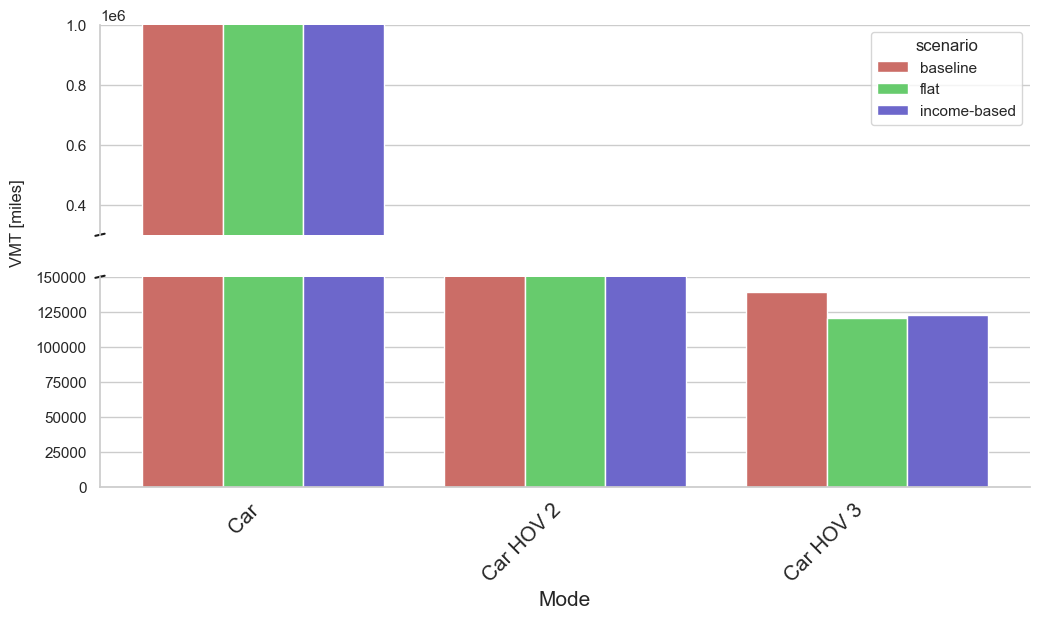

In [30]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create the stacked bar plot with hue="scenario"
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(12, 6))  # Adjust the figure size if needed
#sns.barplot(x='mode', y='length', hue='scenario', data=vmt_mode, order = plot_order_vmt, palette='hls', ax=ax_top)
#sns.barplot(x='mode', y='length', hue='scenario', data=vmt_mode, order = plot_order_vmt, palette='hls', ax=ax_bottom)

sns.barplot(x='mode', y='length', hue='scenario', data=vmt_car, palette='hls', ax=ax_top)
sns.barplot(x='mode', y='length', hue='scenario', data=vmt_car, palette='hls', ax=ax_bottom)

ax_top.set_ylim(bottom=300000, top=1000000)   # those limits are fake
ax_bottom.set_ylim(0,150000)

ax_top.get_xaxis().set_visible(False)


ax_top.set_ylabel("")
ax_bottom.set_ylabel("")

#ax_top.tick_params(size=20)
#ax_bottom.tick_params(size=20)

f.text(0.05, 0.55, "VMT [miles]", va="center", rotation="vertical")

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#ax.tick_params(size=20)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#ax2.tick_params(size=20)

# Customize the plot
#plt.title('Share of Modes by Scenario in the Cordon')
plt.xlabel('Mode', fontsize = 15)
#plt.ylabel('VMT [1e8 km]', fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize=15)  # Rotate x-axis labels for better readability
ax_top.get_yticks()
#plt.yticks(fontsize=18)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals = 0))
# Show the plot
#plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Secondary axis with scatter plot
#ax2 = ax_bottom.twinx()
#sns.scatterplot(x='mode', y='Diff wrt baseline', hue='scenario', data=vmt_mode, ax=ax2, marker='o', s=100, palette='bright')


ax_bottom.legend_.remove()

#ax2 = plt.gca()
#ax2.tick_params(size=22)
plt.show()

In [31]:
vmt_mode_trim = vmt_mode[vmt_mode['scenario'] != 'baseline']

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/4269646888.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


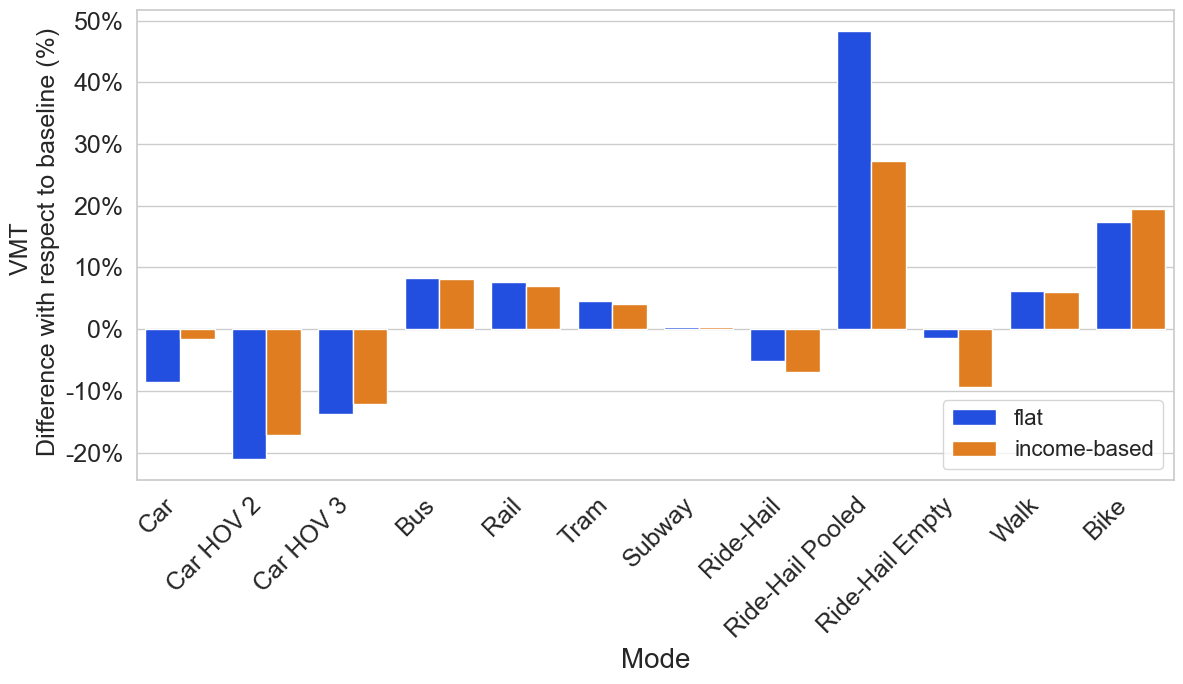

In [32]:
# Plotting using Seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='mode', y='Diff wrt baseline', hue='scenario', data=vmt_mode_trim, order = plot_order_vmt, palette='bright')
plt.xlabel('Mode', fontsize=20)
plt.ylabel('VMT \n Difference with respect to baseline (%)', fontsize=18)
#plt.title('Difference of Trip Count by Mode compared to Baseline by Scenario', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.tight_layout()
plt.legend(loc='lower right', fontsize=16)
# Add label grouping below x-axis
#group_labels = ['Car Modes', 'Car Modes', 'Car Modes', 'Transit', 'Transit', 'Ride-Hail', 'Ride-Hail', 'Active Modes', 'Active Modes']
#ax.set_xticklabels(group_labels)



plt.show()

In [33]:
vmt_mode.to_csv('vmt_mode_export.csv')

In [36]:
# Energy use
list_df[18] = list_df[18][list_df[18]['primaryFuelType']!='Food']
list_df[19] = list_df[19][list_df[19]['primaryFuelType']!='Food']
list_df[20] = list_df[20][list_df[20]['primaryFuelType']!='Food']

In [37]:
list_df[18]['Diff wrt baseline'] = (list_df[18]['primaryFuel'] - list_df[18]['primaryFuel'])
list_df[19]['Diff wrt baseline'] = (list_df[19]['primaryFuel'] - list_df[18]['primaryFuel'])/list_df[18]['primaryFuel']
list_df[20]['Diff wrt baseline'] = (list_df[20]['primaryFuel'] - list_df[18]['primaryFuel'])/list_df[18]['primaryFuel']

/var/folders/s0/c3wmlnq101j6d2dv5gj15fkm0000gn/T/ipykernel_11886/552607534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[20]['Diff wrt baseline'] = (list_df[20]['primaryFuel'] - list_df[18]['primaryFuel'])/list_df[18]['primaryFuel']


In [38]:
#remove emer
emer=['car_emer', 'hov2_emer', 'hov3_emer']

# Create a boolean mask to identify rows that match the values in the list
mask1 = list_df[18]['primaryFuel'].isin(emer)  # Replace 'column_name' with the actual column name you want to use for the condition
mask2 = list_df[19]['primaryFuel'].isin(emer)
mask3 = list_df[20]['primaryFuel'].isin(emer)


# Drop the rows that match the values in the list
list_df[18] = list_df[18][~mask1]
list_df[19] = list_df[19][~mask2]
list_df[20] = list_df[20][~mask3]


In [39]:
tot_e_base = list_df[18]['primaryFuel'].sum()
tot_e_flat = list_df[19]['primaryFuel'].sum()
tot_e_income = list_df[20]['primaryFuel'].sum()

dif_flat = (tot_e_flat-tot_e_base)/tot_e_base
dif_income = (tot_e_income-tot_e_base)/tot_e_base

print(dif_flat)
print(dif_income)

-0.07305354151722654
-0.02788317732547108


In [40]:
primary_e = pd.concat([list_df[18], list_df[19], list_df[20]])

In [41]:
primary_e = primary_e[primary_e['Diff wrt baseline'].notna()]

In [42]:
primary_e

,mode,primaryFuelType,primaryFuel,geo,scenario,Diff wrt baseline
0,bike,Gasoline,3.155696e+08,SF,baseline,0.000000
1,bus,Diesel,1.503530e+12,SF,baseline,0.000000
2,bus_empty,Diesel,1.791480e+12,SF,baseline,0.000000
3,cable_car,Electricity,0.000000e+00,SF,baseline,0.000000
4,cable_car_empty,Electricity,0.000000e+00,SF,baseline,0.000000
...,...,...,...,...,...,...
14,car_hov2,Gasoline,6.148031e+11,SF,income-based,-0.166227
15,car_hov2_emer,Gasoline,5.015918e+10,SF,income-based,-0.226266
16,car_hov3,Electricity,2.398217e+08,SF,income-based,-0.276155
17,car_hov3,Gasoline,4.336503e+11,SF,income-based,-0.113405
